In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


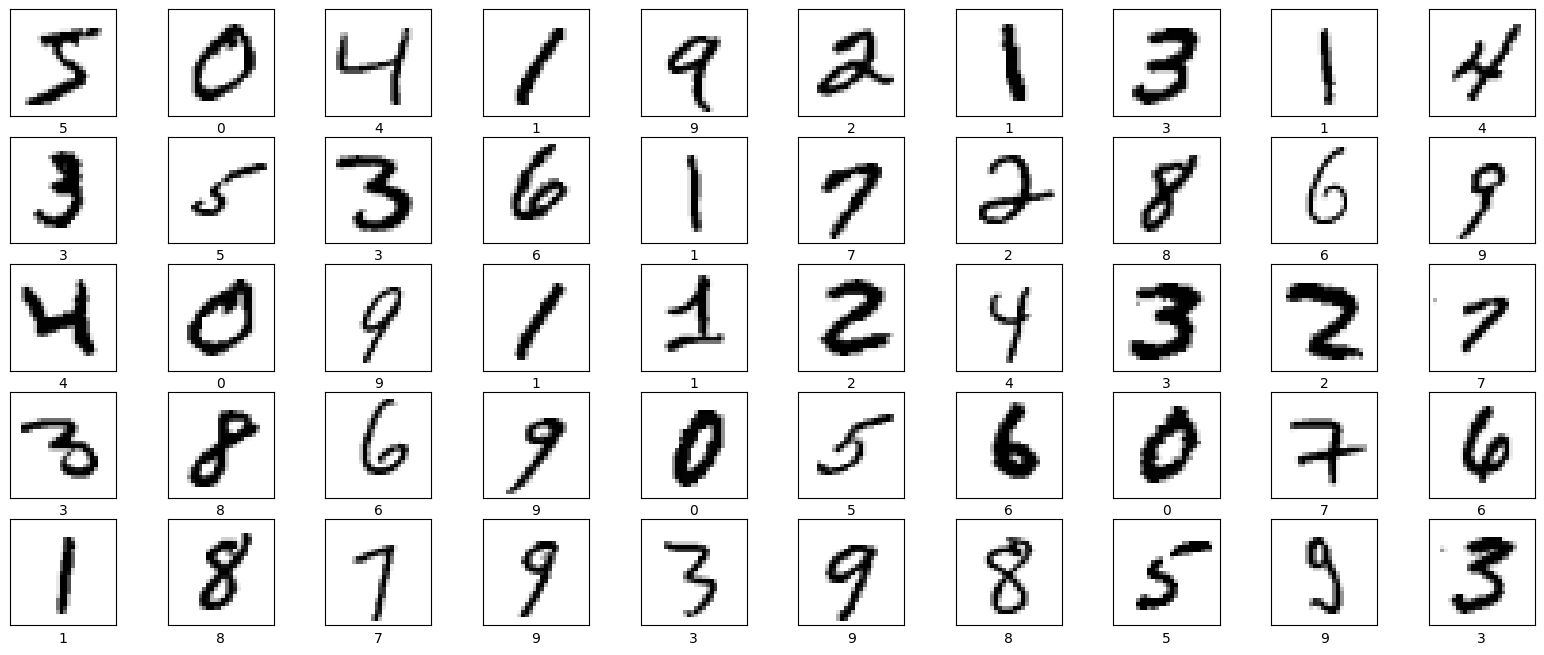

In [3]:
class_names = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(20,8))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i],cmap=plt.cm.gray_r)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
x_train,x_test=x_train/255.0,x_test/255.0

In [8]:
model=keras.Sequential([
    keras.Input(shape=(28,28,1)),
    layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')

])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,154 (1.61 MB)

 Trainable params: 422,154 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(x=x_train,y=y_train,epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.8502 - loss: 0.4641 - val_accuracy: 0.9839 - val_loss: 0.0550
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9737 - loss: 0.0886 - val_accuracy: 0.9898 - val_loss: 0.0373
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9804 - loss: 0.0616 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 46ms/step - accuracy: 0.9848 - loss: 0.0493 - val_accuracy: 0.9907 - val_loss: 0.0333
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.9883 - loss: 0.0373 - val_accuracy: 0.9926 - val_loss: 0.0316
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9889 - loss: 0.0345 - val_accuracy: 0.9914 - val_loss: 0.0343
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 45ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9899 - val_loss: 0.0399
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.9941 -

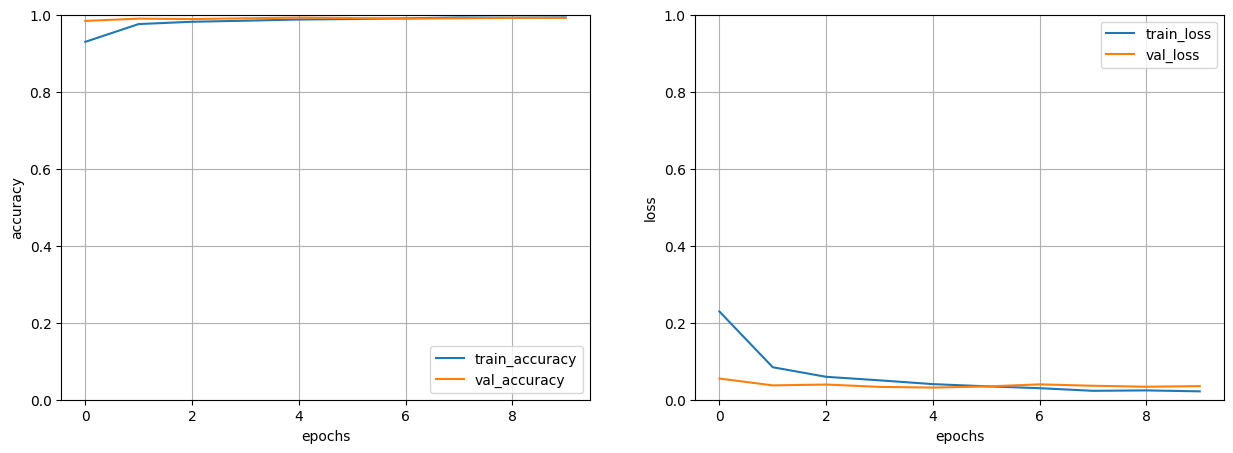

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.legend(loc='lower right')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0,1)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [12]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [13]:
predictions[0]

array([1.9924606e-20, 1.5428728e-13, 4.1820808e-15, 4.1143356e-13,
       1.3985069e-19, 5.5595481e-19, 3.7691713e-29, 9.9999994e-01,
       1.5151944e-20, 1.0390182e-12], dtype=float32)

In [14]:
np.argmax(predictions[0])

np.int64(7)

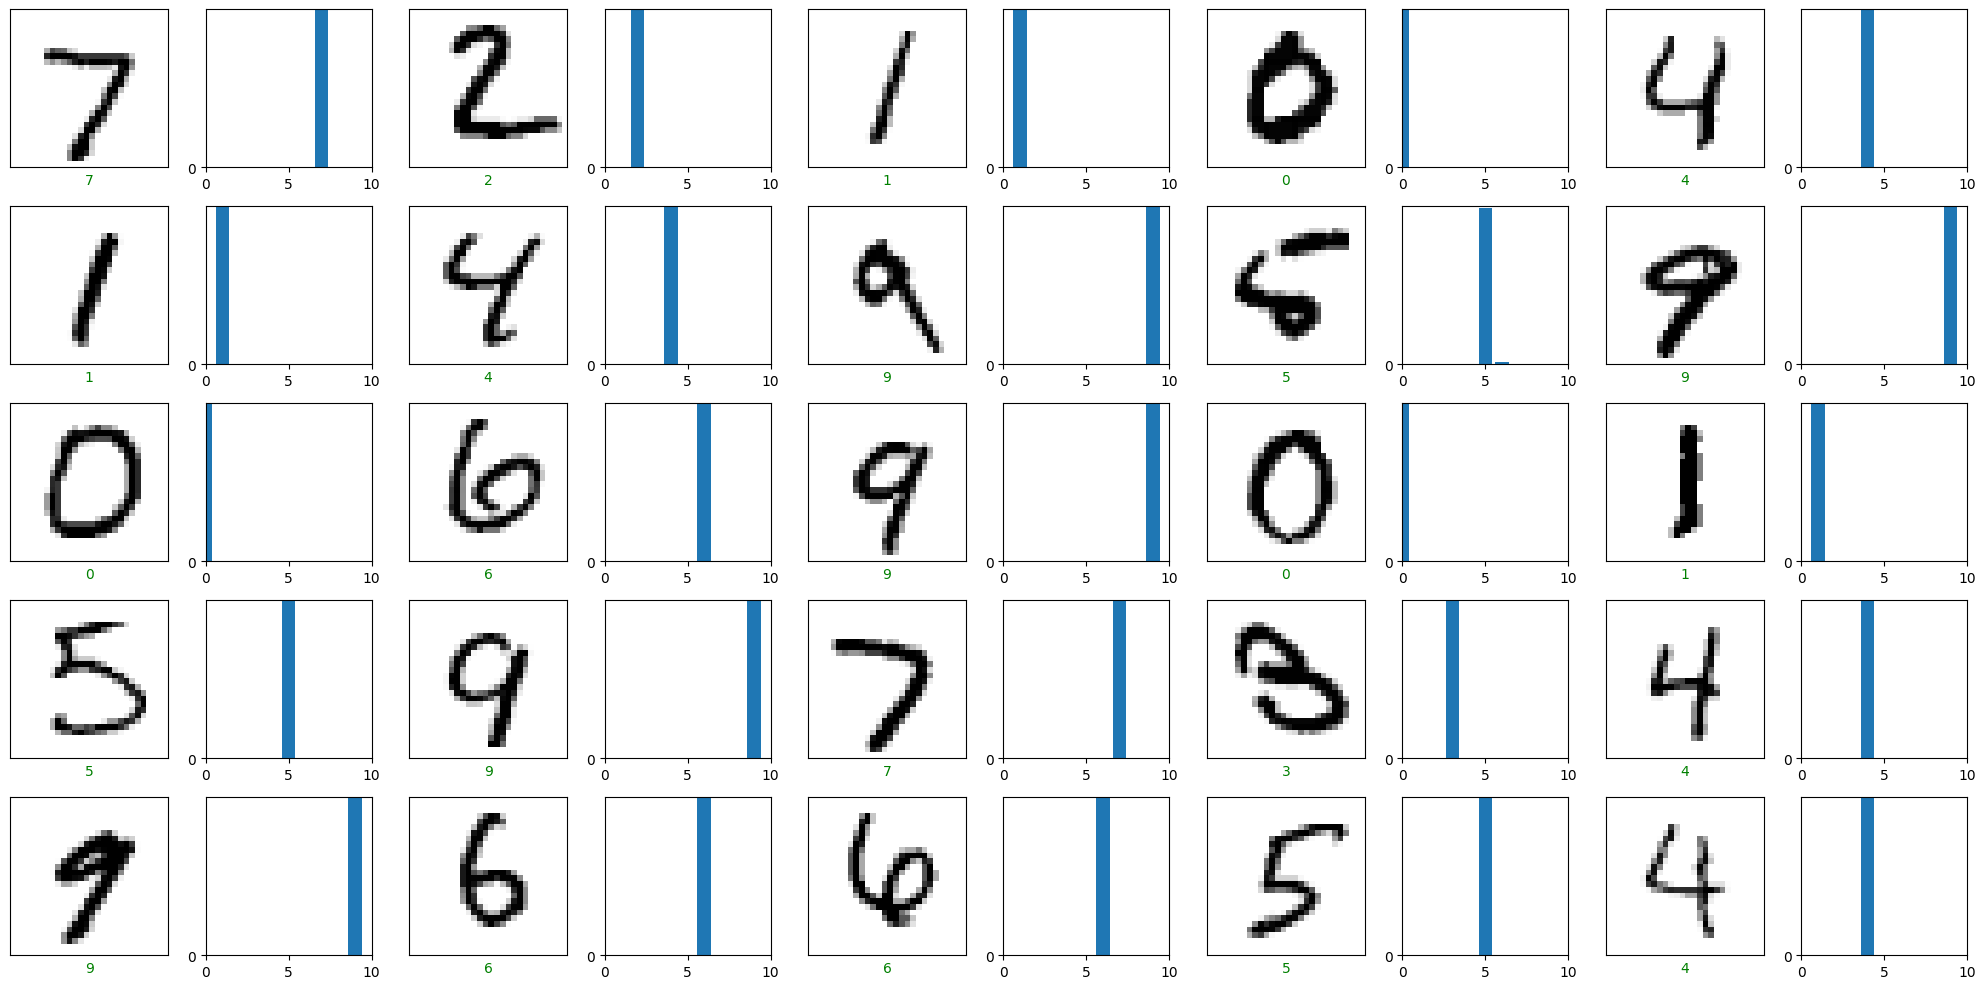

In [15]:
rows=5
cols=5

plt.figure(figsize=(20,10))

for i in range(25):
    plt.subplot(rows,2*cols,2*i+1)
    plt.imshow(x_test[i],cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])

    if y_test[i]==np.argmax(predictions[i]):
        plt.xlabel(class_names[np.argmax(predictions[i])],color='green')
    else:
         plt.xlabel(class_names[np.argmax(predictions[i])],color='red')

    plt.subplot(rows,2*cols,2*i+2)
    plt.bar(range(10),predictions[i],)
    plt.yticks(range(0,1))
    plt.ylim([0,1])
    plt.xlim([0,10])
plt.tight_layout()
plt.show()



In [16]:
model.save('my_model.keras')

In [17]:
from google.colab import files
files.download("my_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from google.colab import drive
import tensorflow as tf
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/my_model.keras')
print("Model saved successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully!
